#### Trabajo semanal 8 - Filtros digitales.

1) Realizar el ejercicio 4 del TP5 de Filtros digitales.

2) Se dispone del siguiente filtro digital:

<img src="image83.png">

a) Para la transferencia del filtro con M = 2 y α=0.8; calcular 1) el diagrama de polos y ceros y la respuesta en frecuencia de 2) módulo, 3) fase y 4) retardo de grupo.

b) Si quisiéramos anular una senoidal interferente de 125 Hz y su armónica de 375 Hz y sólo dispone de un sumador y el filtro de la figura con M = 4. Proponga un esquema de la solución y calcule los parámetros del filtro que sería necesario adecuar.

### Manuscrito

<img src="image85.jpg">
<img src="image84.jpg">

En el ej2 se obtiene la siguiente transferencia 

$$H(Z) = \frac{\alpha+Z^{-M}}{1+\alpha Z^{-M}}$$

### Simulaciones

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz, lfilter, group_delay, tf2zpk

def plot_filter_digital(b, a, fs):
    # Frecuencia de respuesta (para ver el módulo y fase del filtro)
    w, h = freqz(b, a, fs=fs)

    # w = w * fs / (2 * np.pi)

    # Mostrar el módulo y la fase del filtro
    plt.figure()

    plt.subplot(2, 1, 1)
    plt.plot(w, np.abs(h))
    plt.title('Módulo del filtro')
    plt.ylabel('Módulo')

    plt.subplot(2, 1, 2)
    plt.plot(w, np.angle(h))
    plt.title('Fase del filtro')
    plt.ylabel('Fase (radianes)')
    plt.xlabel('Frecuencia (rad/muestra)')

    plt.tight_layout()

    w, gd = group_delay((b, a), fs=fs)

    # Graficar el retardo de grupo
    plt.figure()
    plt.plot(w, gd)
    plt.title('Retardo de grupo del filtro')
    plt.xlabel('Frecuencia (rad/muestra)')
    plt.ylabel('Retardo de grupo (muestras)')
    plt.grid()

    plt.tight_layout()

    plt.show()

def plot_signal(input):
    # Graficar señal de entrada y filtrada
    plt.figure()
    plt.stem(input)
    plt.title('Señal de entrada')
    plt.xlabel('Muestra')
    plt.ylabel('Amplitud')
    plt.show()

def plot_filter_signal(b, a, input):

    # Definir condiciones iniciales nulas
    zi = np.zeros(max(len(a), len(b)) - 1)
    # Aplicar el filtro a la señal rampa
    salida = lfilter(b, a, input)
    plot_signal(input)
    plt.figure()
    plt.stem(salida)
    plt.title('Señal filtrada')
    plt.xlabel('Muestra')
    plt.ylabel('Amplitud')
    # plt.xlim((0, 100))
    # plt.legend()

    plt.show()
    
def zplane(b, a):
    """ Plot the complex z-plane given a transfer function """
    # Compute zeros and poles
    zeros, poles, gain = tf2zpk(b, a)

    # Plot unit circle
    theta = np.linspace(0, 2*np.pi, 100)
    unit_circle = np.exp(1j*theta)
    plt.plot(np.real(unit_circle), np.imag(unit_circle), 'b--')  # Unit circle

    # Plot zeros and poles
    plt.scatter(np.real(zeros), np.imag(zeros), s=50, facecolors='none', edgecolors='r', label='Zeros')
    plt.scatter(np.real(poles), np.imag(poles), s=50, facecolors='none', edgecolors='b', label='Poles')

    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.grid()
    plt.legend()
    plt.xlabel('Real')
    plt.ylabel('Imaginary')
    plt.title('Poles and Zeros')
    plt.axis('equal')
    plt.show()

In [3]:
fs = 1000

def generator_sin(fs, frecuencia, fase, amplitud):
    t = np.arange(0, .15, 1/fs)  # Vector de tiempo de 1 segundo
    # Generar señal senoidal
    return amplitud * np.sin(2 * np.pi * frecuencia * t + fase)

## Promediador

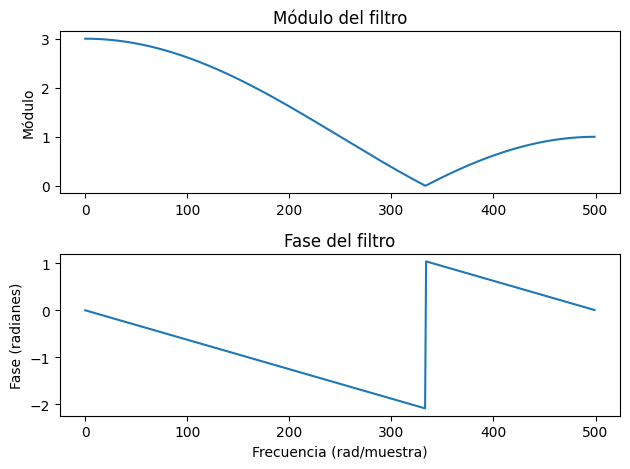

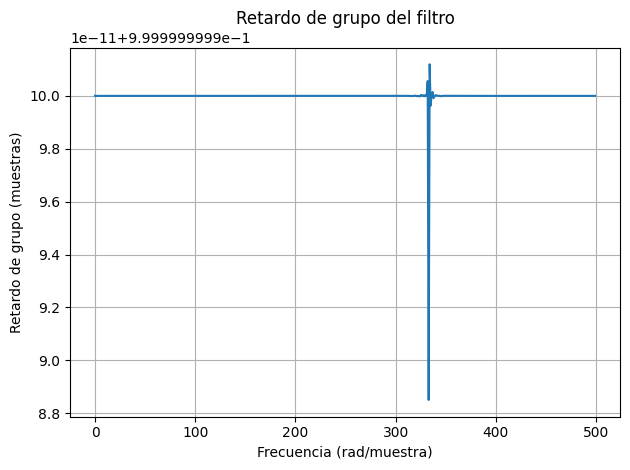

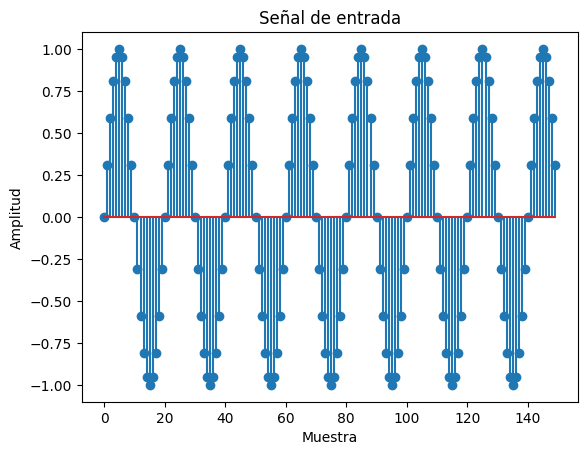

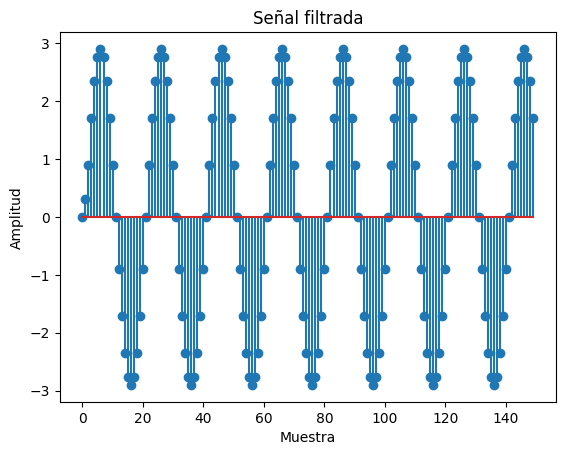

In [4]:
b = [1,1,1]
a = [1]

plot_filter_digital(b, a, fs)
plot_filter_signal(b, a, generator_sin(fs, 50, 0, 1))


## Diferenciador

/home/xxx/.local/lib/python3.10/site-packages/scipy/signal/_filter_design.py:693: RuntimeWarning: divide by zero encountered in divide
  gd = np.real(num / den) - a.size + 1
/home/xxx/.local/lib/python3.10/site-packages/scipy/signal/_filter_design.py:693: RuntimeWarning: invalid value encountered in divide
  gd = np.real(num / den) - a.size + 1
/tmp/ipykernel_33495/942600431.py:27: UserWarning: The group delay is singular at frequencies [0.000], setting to 0
  w, gd = group_delay((b, a), fs=fs)


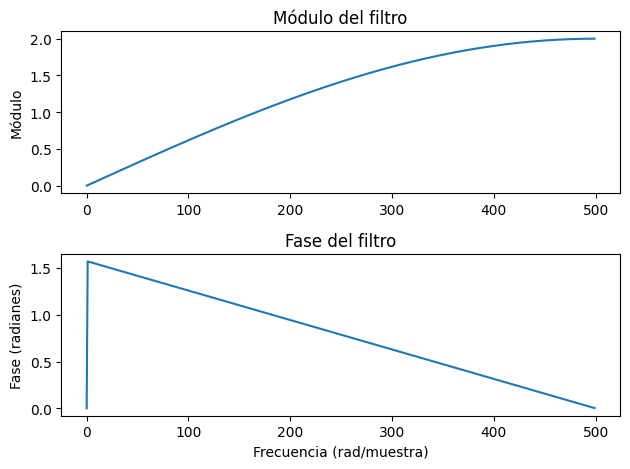

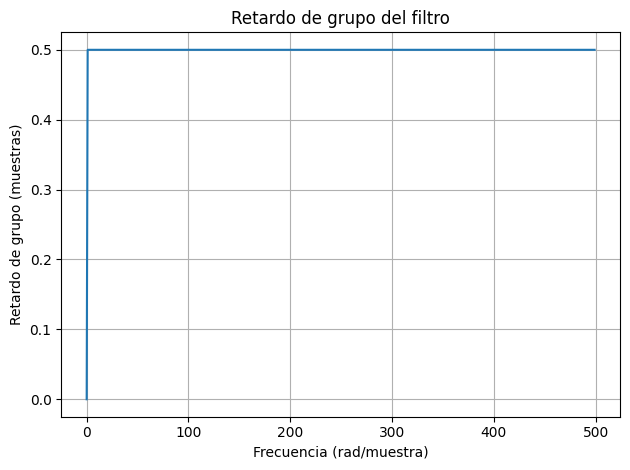

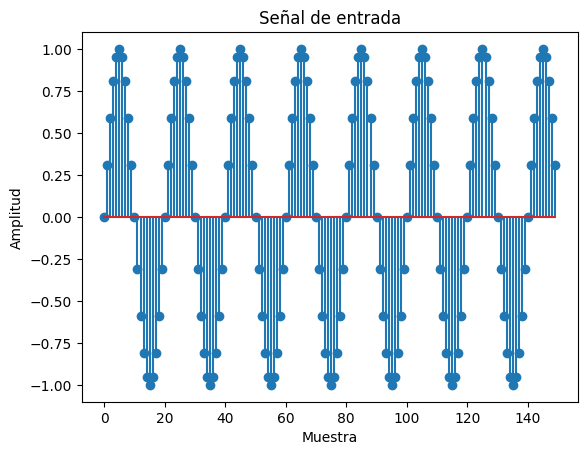

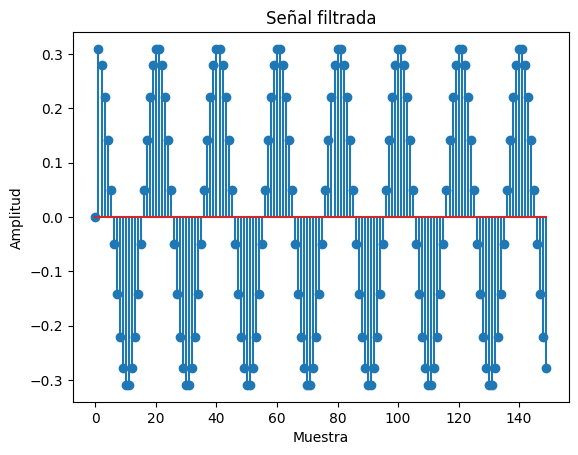

In [5]:
b = [1,-1]
a = [1]

plot_filter_digital(b, a, fs)
plot_filter_signal(b, a, generator_sin(fs, 50, 0, 1))

## Verificacion de diferenciador de segundo orden

/tmp/ipykernel_33495/942600431.py:27: UserWarning: The group delay is singular at frequencies [0.000], setting to 0
  w, gd = group_delay((b, a), fs=fs)


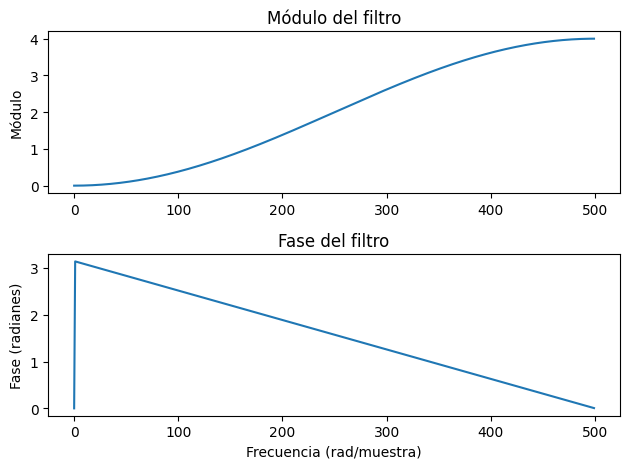

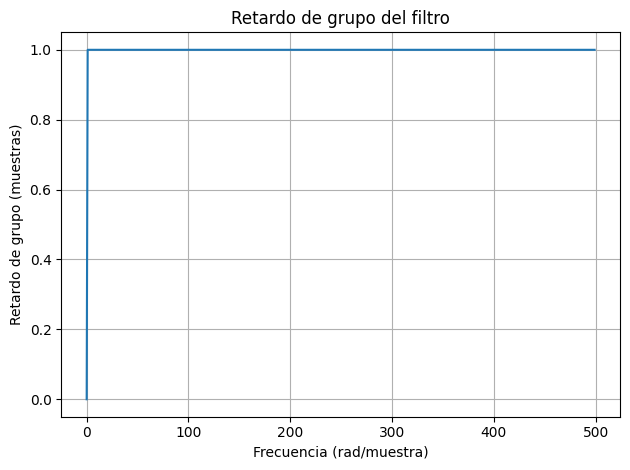

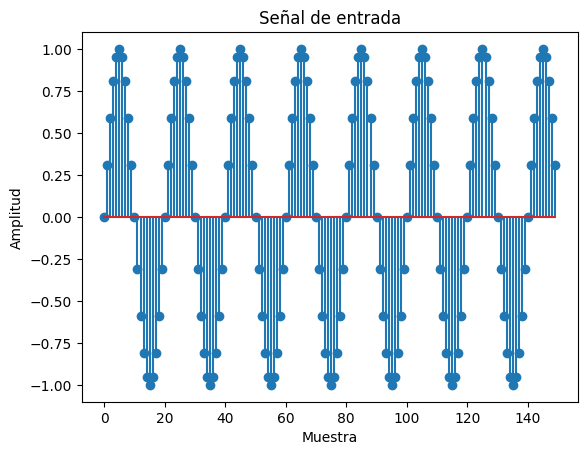

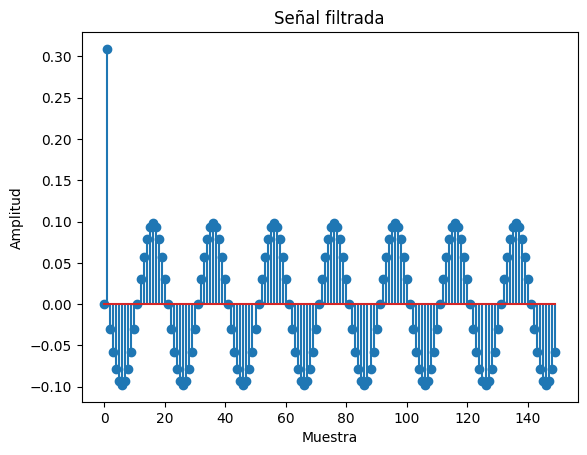

In [6]:
b = [1, -2, 1]
a = [1]

plot_filter_digital(b, a, fs)
plot_filter_signal(b, a, generator_sin(fs, 50, 0, 1))

## Filtro elimina continua.

/tmp/ipykernel_33495/942600431.py:27: UserWarning: The group delay is singular at frequencies [0.000], setting to 0
  w, gd = group_delay((b, a), fs=fs)


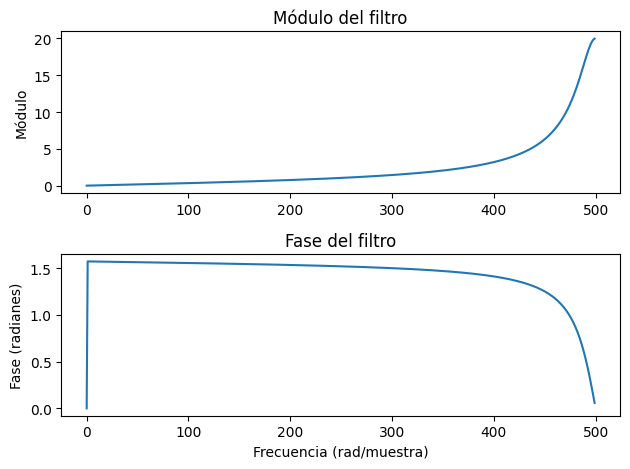

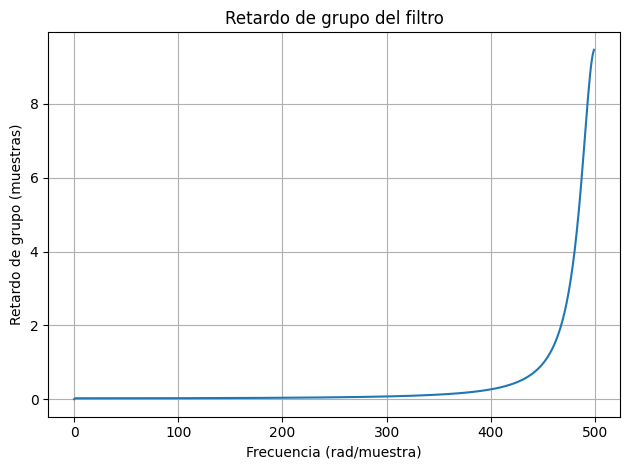

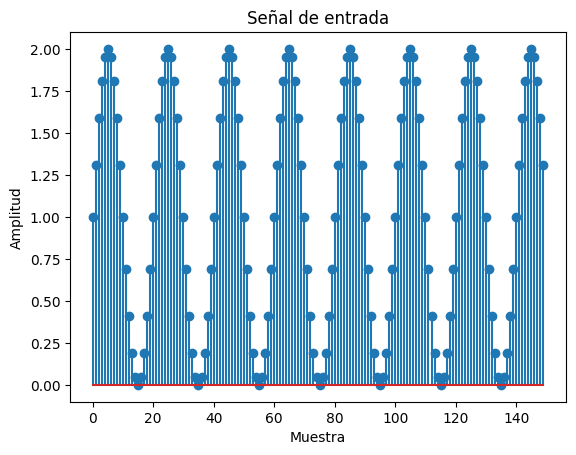

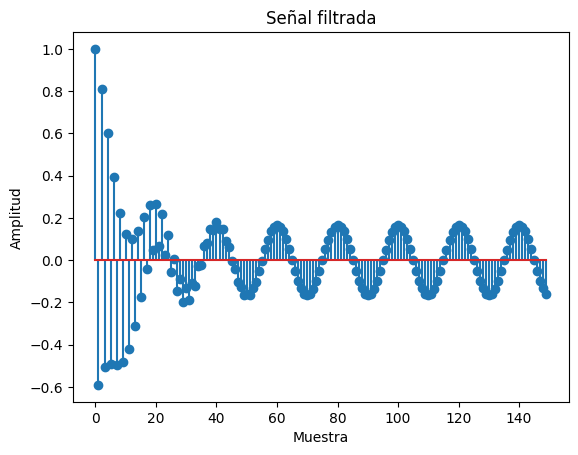

In [7]:
DC = 1

b = [1,-1]
a = [1,.9]

plot_filter_digital(b, a, fs)
plot_filter_signal(b, a, generator_sin(fs, 50, 0, 1) + DC)

### Ej2a)

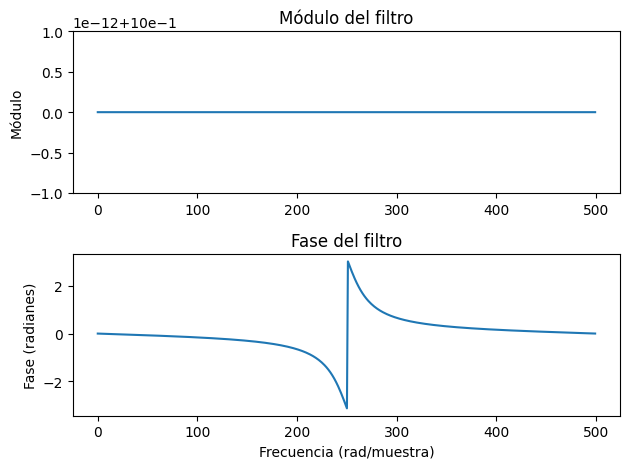

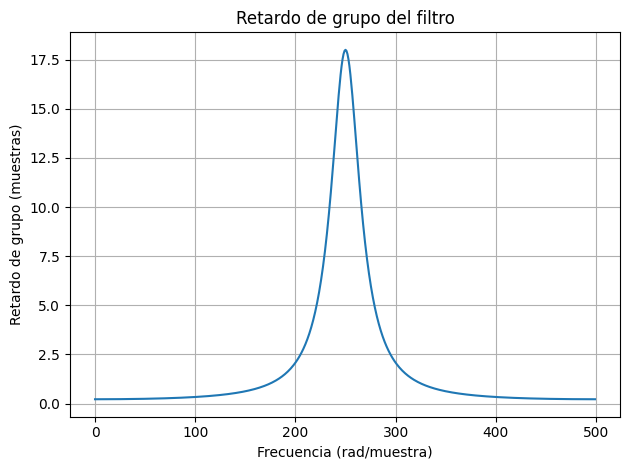

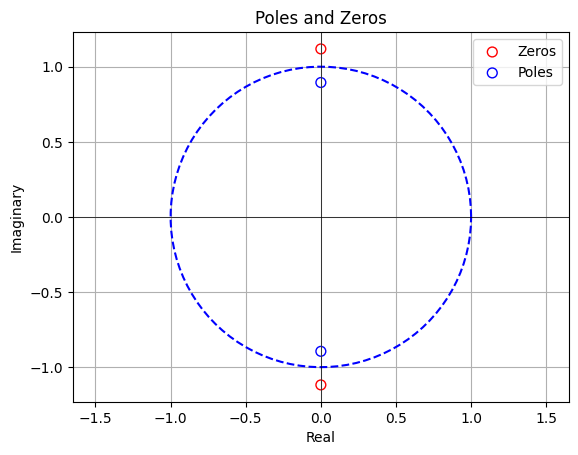

In [8]:
b = [.8, 0, 1]
a = [1, 0, .8]

plot_filter_digital(b, a, fs)
zplane(b,a)

Nota: Se observa cambio de fase para la freq 250. Ademas del retardo de 18 muestras.

### Ej2b)

Procedo a generar una señal compuestra x 2 tonos de distinta frecuencia para verificar q son filtradas.

<center><img src="image90.png"></center>

$$H(Z)=Z^{-4}$$
$$H'(Z)=Z^{-4} + 1$$



/tmp/ipykernel_33495/942600431.py:27: UserWarning: The filter's denominator is extremely small at frequencies [0.785, 2.356],             around which a singularity may be present
  w, gd = group_delay((b, a), fs=fs)


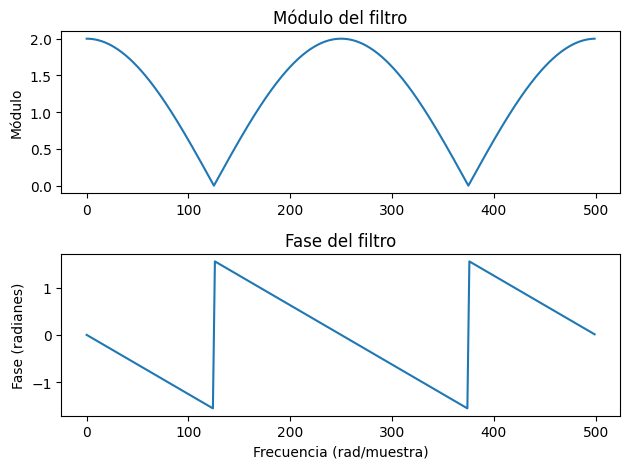

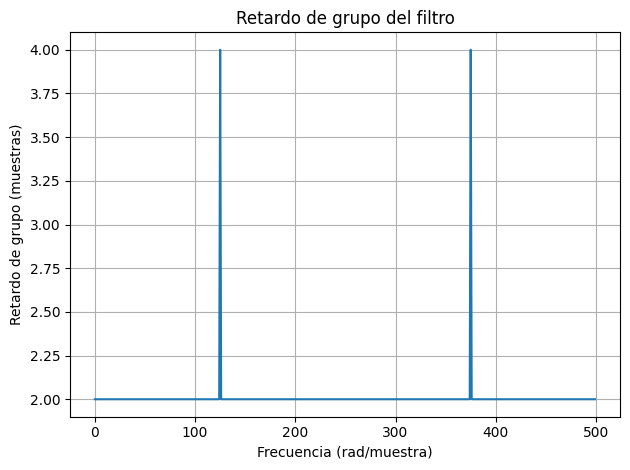

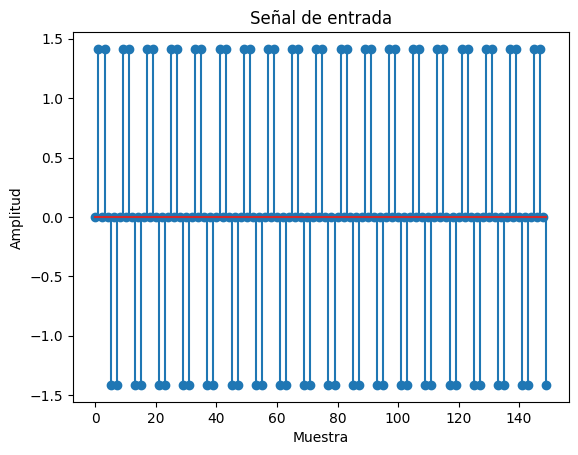

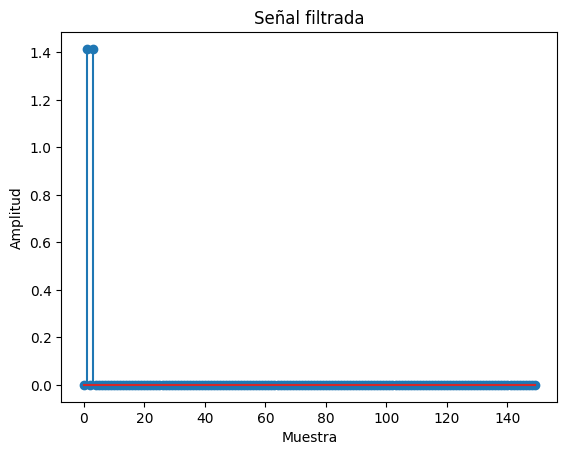

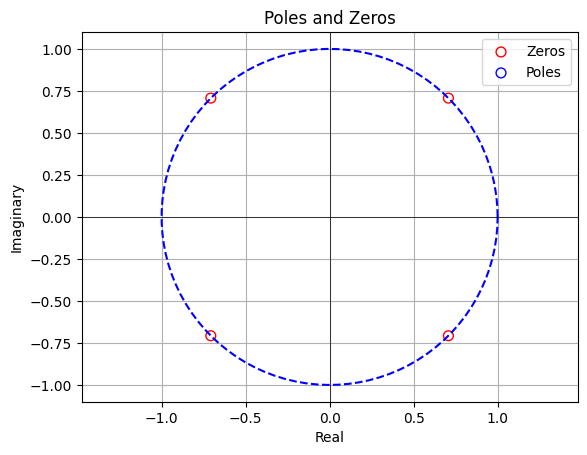

In [9]:
b = [1, 0, 0, 0, 1]
a = [1]
signal = generator_sin(fs, 125, 0, 1) + generator_sin(fs, 375, 0, 1)
# signal = generator_sin(fs, 375, 0, 1)
plot_filter_digital(b, a, fs)
# salida = lfilter(b, a, signal)
plot_filter_signal(b, a, signal)
# plot_signal(signal + salida)
zplane(b,a)
